Using Theano backend.


(500, 2)
(500,)


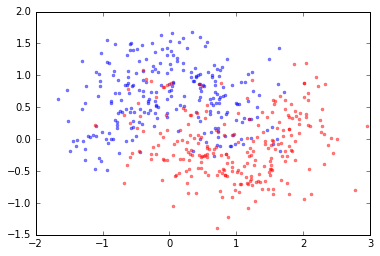

In [1]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 
    
%matplotlib inline
data, label = make_moons(n_samples=500, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.', alpha=.5);
plt.plot(data[label1,0], data[label1,1],'r.', alpha=.5);

In [5]:
%rm -rf poly_
scores, confusions, predictions = poly(data,label, n_folds=8, verbose=1, feature_selection=False, scoring='auc', concurrency=4)

[polyssifier:INFO]:Building classifiers ...
[polyssifier:INFO]:Initialization, done.
[polyssifier:INFO]:Training Multilayer Perceptron 4
[polyssifier:INFO]:Training Multilayer Perceptron 0
[polyssifier:INFO]:Training Nearest Neighbors 0
[polyssifier:INFO]:Training Nearest Neighbors 4
[polyssifier:INFO]:Nearest Neighbors          0:  Train 0.95/ Test 0.94, 0.06 sec
[polyssifier:INFO]:Training Nearest Neighbors 1
[polyssifier:INFO]:Nearest Neighbors          4:  Train 0.95/ Test 0.92, 0.06 sec
[polyssifier:INFO]:Training Nearest Neighbors 5
[polyssifier:INFO]:Nearest Neighbors          5:  Train 0.95/ Test 0.97, 0.04 sec
[polyssifier:INFO]:Training Nearest Neighbors 6
[polyssifier:INFO]:Nearest Neighbors          1:  Train 0.95/ Test 0.92, 0.06 sec
[polyssifier:INFO]:Training Nearest Neighbors 2
[polyssifier:INFO]:Nearest Neighbors          6:  Train 0.95/ Test 0.95, 0.05 sec
[polyssifier:INFO]:Training Nearest Neighbors 7
[polyssifier:INFO]:Nearest Neighbors          2:  Train 0.96/ Tes

                                 mean       std       min       max
Multilayer Perceptron train  0.910509  0.004202  0.903796  0.914743
                      test   0.911588  0.026135  0.882414  0.951172
Nearest Neighbors     train  0.949747  0.003216  0.946154  0.956350
                      test   0.926267  0.030126  0.876171  0.971904
SVM                   train  0.926675  0.005633  0.918967  0.935739
                      test   0.919848  0.028898  0.886576  0.964844
Linear SVM            train  0.911101  0.004216  0.904427  0.915536
                      test   0.912507  0.026176  0.884495  0.952148
Decision Tree         train  1.000000  0.000000  1.000000  1.000000
                      test   0.817540  0.044473  0.758065  0.890625
Random Forest         train  0.999676  0.000320  0.999053  1.000000
                      test   0.904399  0.016168  0.877732  0.927159
Logistic Regression   train  0.911255  0.004193  0.904659  0.915786
                      test   0.912247  0.026502 

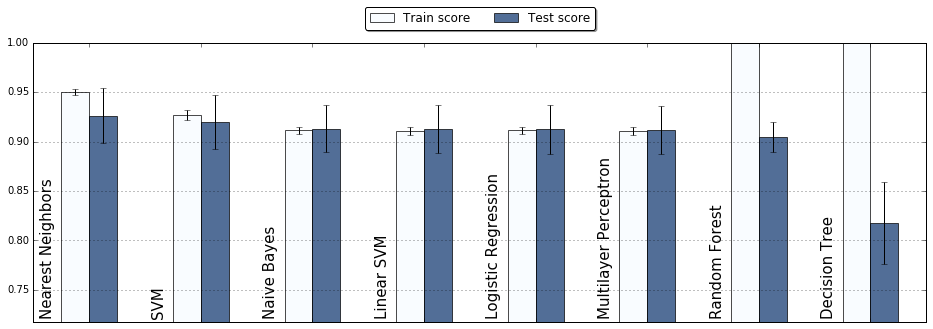

In [6]:
plot(scores)

In [7]:
for key, val in confusions.items():
    print(key)
    print(val)

Nearest Neighbors
[[ 227.   23.]
 [  42.  208.]]
Naive Bayes
[[ 208.   42.]
 [  41.  209.]]
Decision Tree
[[ 203.   47.]
 [  44.  206.]]
Logistic Regression
[[ 210.   40.]
 [  39.  211.]]
Linear SVM
[[ 209.   41.]
 [  39.  211.]]
Random Forest
[[ 224.   26.]
 [  45.  205.]]
SVM
[[ 220.   30.]
 [  50.  200.]]
Multilayer Perceptron
[[ 193.   57.]
 [  25.  225.]]


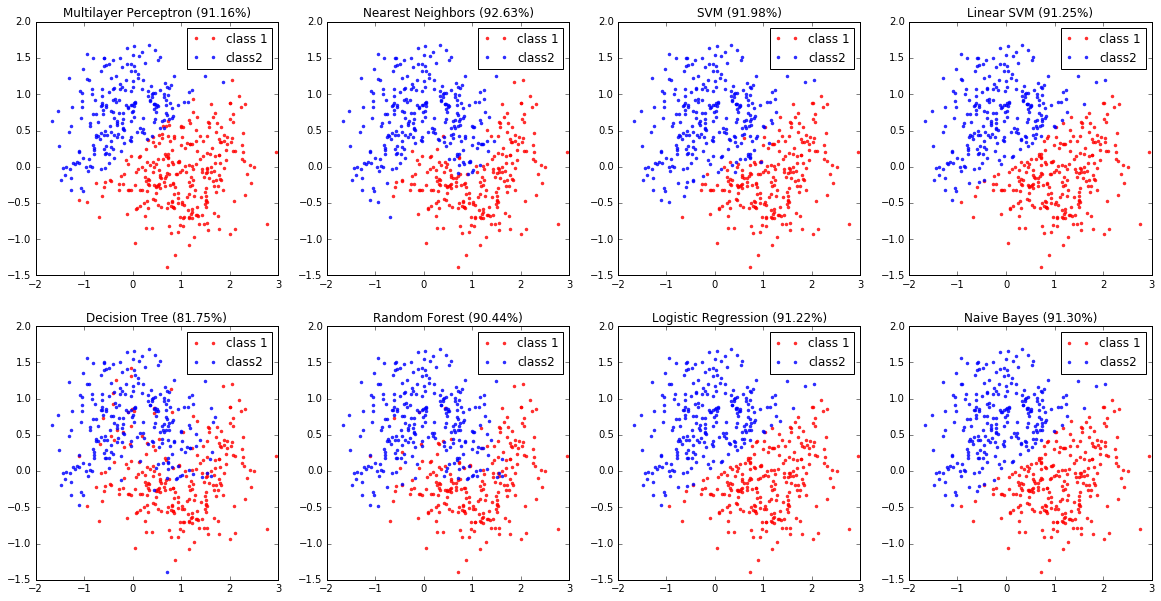

In [8]:
plt.figure(figsize=(20, 10))
for n, (key, pred) in enumerate(predictions.items()):
    plt.subplot(2,4,n+1)
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))